<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Insurance_Charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/IIIT-A Internship/insurance.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

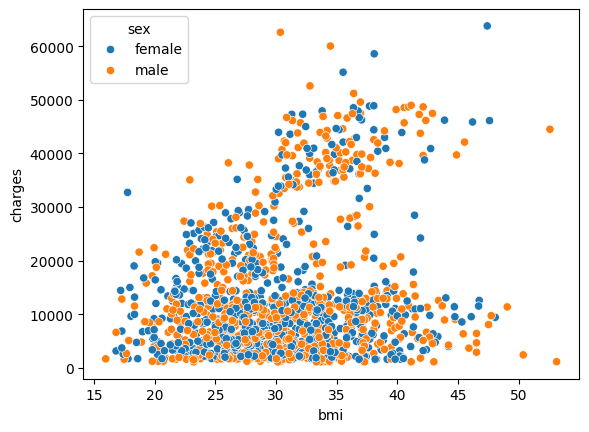

In [ ]:
sns.scatterplot(x="bmi", y="charges", data=data, hue="sex", legend=True)

<Axes: xlabel='charges'>

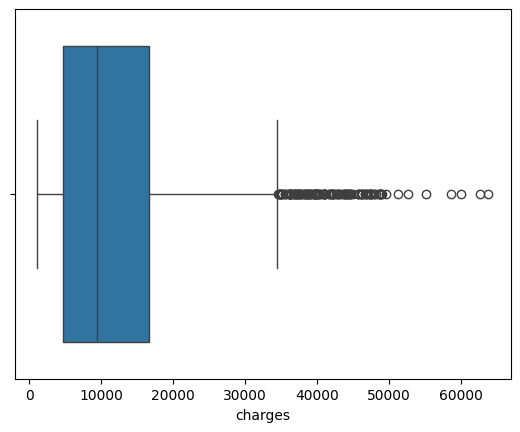

In [ ]:
sns.boxplot(data=data, x="charges")

<Axes: xlabel='smoker', ylabel='charges'>

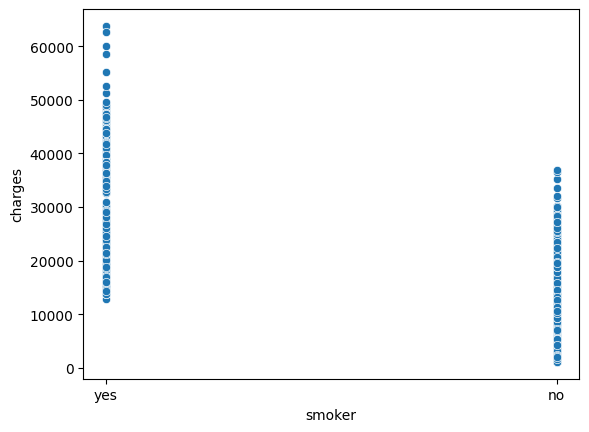

In [ ]:
sns.scatterplot(data=data, x="smoker", y="charges")

<Axes: xlabel='age', ylabel='charges'>

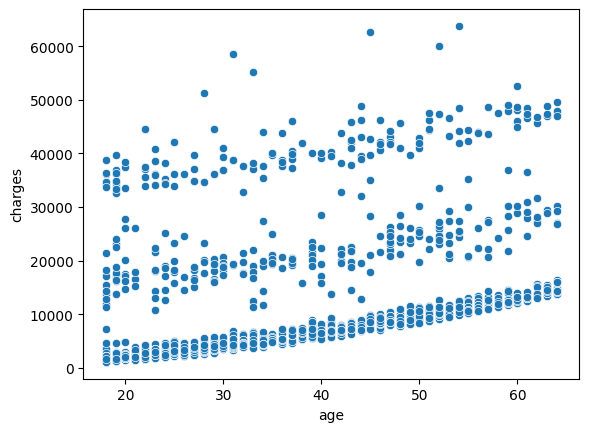

In [ ]:
sns.scatterplot(data=data, x="age", y="charges")

{'whiskers': [<matplotlib.lines.Line2D at 0x7d18ef9e0610>,
 'caps': [<matplotlib.lines.Line2D at 0x7d18ef9e0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d18ef9e0370>],
 'medians': [<matplotlib.lines.Line2D at 0x7d18ef9e1090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d18ef9e1330>],
 'means': []}

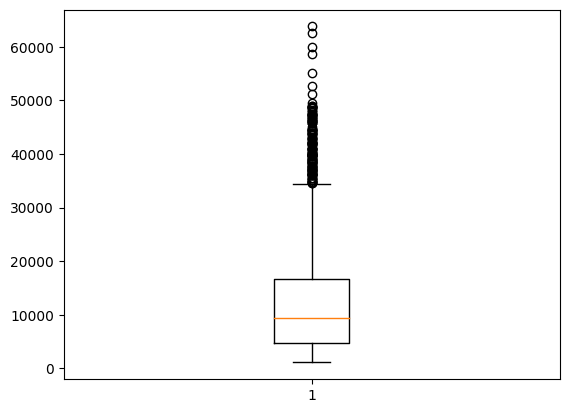

In [ ]:
plt.boxplot(data["charges"])

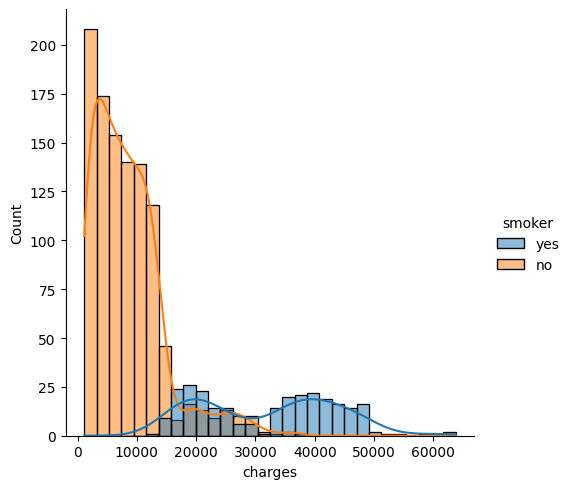

In [ ]:
sns.displot(data=data, x="charges", kde=True, hue="smoker")

In [ ]:
#Converting categorical variable into numerical
from sklearn import preprocessing

colList = data.columns.tolist()
label_encoder = preprocessing.LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['sex'].unique()

data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['smoker'].unique()

data['region'] = label_encoder.fit_transform(data['region'])
data['region'].unique()

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

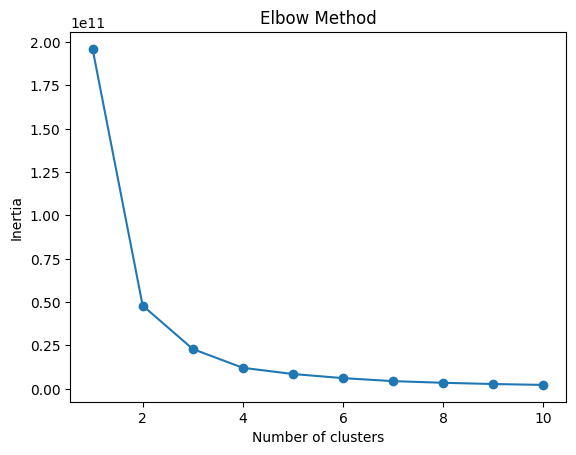

In [12]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


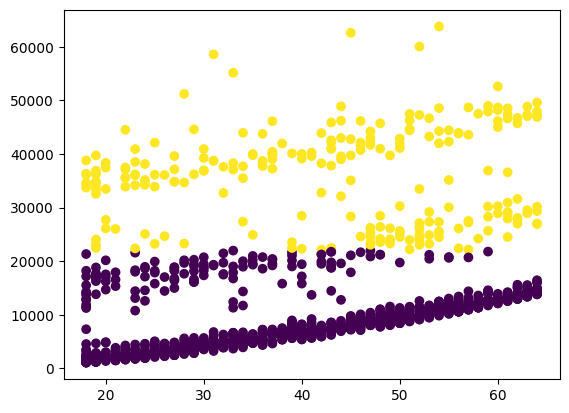

In [33]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(data["age"], data["charges"], c=kmeans.labels_)